In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Week-2

**Note to Learners**: 

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. Ignore the vector $y$. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [2]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

## Problem 1
Plot the dataset using matplotlib.

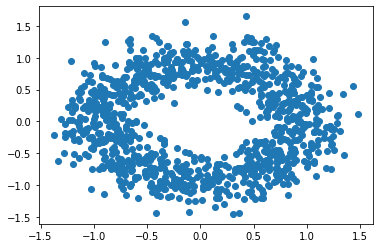

In [3]:
# Enter your solution here
plt.scatter(X[:, 1], X[:, 0])
X = X.T

## Problem 2
How many samples are there in the dataset?


In [4]:
# Enter your solution here
X.shape[0]

2

## Problem 3
How many features are there in the dataset?

In [5]:
# Enter your solution here
X.shape[1]

1000

## Problem 4
Find the kernel matrix $K$ using the polynomial kernel with degree $2$. 

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [6]:
# Enter your solution here
K_pol = (X.T@X + 1) ** 2
np.sqrt(np.sum(K_pol ** 2))/1000

2.096195646589988

## Problem 5
Find the kernel matrix $K$ using the Gaussian kernel with parameter $\sigma = 2$. 

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [7]:
# Enter your solution here
from scipy.spatial.distance import cdist

Z = cdist(X.T, X.T, metric="sqeuclidean")

K_gaus = np.exp(-Z/8)

np.sqrt(np.sum(K_gaus ** 2))/1000

0.8079400085320029

## Problem 6
Find the center of the kernel matrix $K$ obtained in problem 2. Call this centered matrix $KC$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} KC_{ij}^2}
$$

In [9]:
# Enter your solution here
I = np.ones((1000, 1000)) * (1/1000)

KC = K_pol - I@K_pol - K_pol@I + I@K_pol@I
np.sqrt(np.sum(KC ** 2)) / 1000

1.4517985176976844

## Problem 7
Find the projections (scalar) of all the data points on to the first two principal components obtained using polynomial kernel of degree 2.

<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the projections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$\sum_{i = 1}^{n} \alpha_i + \sum_{i = 1}^{n} \beta_i$$

In [11]:
# Enter your solution here
w, v = np.linalg.eigh(KC)

alp = (KC@v[:, -1])/np.sqrt(w[-1])
bet = (KC@v[:, -2])/np.sqrt(w[-2])

(np.sum(np.abs(alp)) + np.sum(np.abs(bet))) / 1000

1.7447267990953337